In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
%run sqlite_execution.py
db_handler = Sqlite_Handler()
# db_handler.drop_duplicates()
info = db_handler.get_info()
info

In [ ]:
%run visualizer.py
plot_captcha_info(info, figsize=(4,10))

In [41]:
%run pytorch_training.py
train_model_on_captcha_string(db_handler, "bonsai tree", save=True)
# train_models_on_all_captcha_strings(db_handler, threshold=100)

Training model on bonsai tree...
x shape: (300, 3, 128, 128)
y shape: (300, 1)
train size: 225, test size: 75
single element shape: torch.Size([3, 128, 128])
Epoch: 1, Test Loss: 0.0078, Accuracy: 56/75, 74.67%
Epoch: 2, Test Loss: 0.0076, Accuracy: 56/75, 74.67%
Epoch: 3, Test Loss: 0.0075, Accuracy: 56/75, 74.67%
Epoch: 4, Test Loss: 0.0073, Accuracy: 56/75, 74.67%
Epoch: 5, Test Loss: 0.0067, Accuracy: 56/75, 74.67%
Epoch: 6, Test Loss: 0.0062, Accuracy: 65/75, 86.67%
Epoch: 7, Test Loss: 0.0058, Accuracy: 57/75, 76.00%
Epoch: 8, Test Loss: 0.0045, Accuracy: 66/75, 88.00%
Epoch: 9, Test Loss: 0.0044, Accuracy: 65/75, 86.67%
Epoch: 10, Test Loss: 0.0040, Accuracy: 68/75, 90.67%
Epoch: 11, Test Loss: 0.0039, Accuracy: 67/75, 89.33%
Epoch: 12, Test Loss: 0.0045, Accuracy: 62/75, 82.67%
Epoch: 13, Test Loss: 0.0040, Accuracy: 64/75, 85.33%
Epoch: 14, Test Loss: 0.0039, Accuracy: 67/75, 89.33%
Epoch: 15, Test Loss: 0.0042, Accuracy: 64/75, 85.33%
Epoch: 16, Test Loss: 0.0041, Accuracy: 6

Testing 23-224_02 on bonsai tree...
Correct: 280/300, Accuracy: 93.33%
Testing 23-224_2 on car...
Correct: 354/359, Accuracy: 98.61%
Testing 23-224_02 on flower...
Correct: 460/464, Accuracy: 99.14%
Testing 23-224_01 on helicopter...
Correct: 221/242, Accuracy: 91.32%
Testing 23-224_01 on laptop...
Correct: 286/303, Accuracy: 94.39%
Testing 23-224_01 on motorcycle...
Correct: 306/309, Accuracy: 99.03%
Testing 23-224_01 on tree...
Correct: 289/294, Accuracy: 98.30%


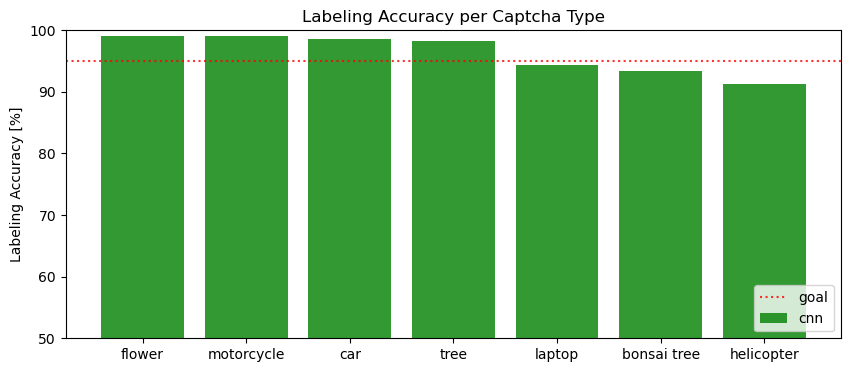

In [42]:
%run pytorch_training.py
model_accuracy = test_models_on_all_captcha_strings(db_handler)
%run visualizer.py
plot_model_accuracy(model_accuracy, figsize=(4,10))

In [ ]:
assert 1 == 0 # to avoid execution of code below

In [ ]:
%run collector/collector.py
urls = [
    "https://nopecha.com/demo/hcaptcha",
    "https://democaptcha.com/demo-form-eng/hcaptcha.html",
    "https://freebitco.in/signup/?op=s", 
    "https://accounts.shopify.com/signup?rid=f8d4b2e6-f0fe-41ab-83e5-e633974bd42b&signup_strategy=password",
    "https://www.dierenkliniekoudorp.nl/",
    "https://cellar335.com/",
    "https://www.salumificiovecchi.it/",
    "https://economygarages.com/",
    "https://www.assimilationdesigns.com/"
    "https://raleighvehiclewraps.com/"
    ]
collect_data(db_handler, urls[0], count=100, collect_v2=False)

In [ ]:
%run manual_classifier.py
mc = Manual_Classifier(db_handler)

In [ ]:
%run vilt.py
vilt = Vilt_Classifier()

In [ ]:
vilt_accuracy = pd.concat((info, vilt.get_accuracy_for_all_captchas(db_handler)), axis=1)
plot_model_accuracy(vilt_accuracy, figsize=(4,10))